In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
%run 4.3.2-common.ipynb

Principal values are: tensor([   62.6172, 48991.0547])
One principal value will be much larger
than the other - indicating data points are
spread more or less along a straight line
That straight line is the principal axis
It should be along y = 2x showing the
 correlation in the data


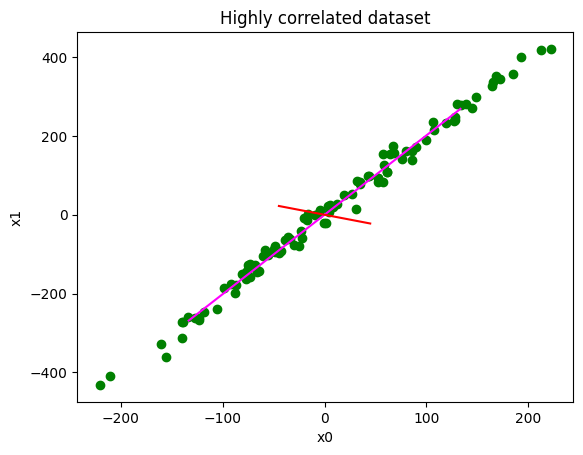

In [3]:
torch.manual_seed(42)
N = 100
# We create a random feature vector
x_0 = torch.normal(0, 100, (N,))

# Then we create another feature vector which is
# highly correlated with the previous feature:
# x1 = 2 * x0.
# We add random noise to this second feature.
x_1 = 2 * x_0 + torch.normal(0, 20, (N,))

# Create the data matrix with x0, x1 as columns
X = torch.column_stack((x_0, x_1))

# Perform PCA
# One principal value will be >> than the other
# indicating data points are spread more or less
# along a straight line. That straight line will
# be the principal axis, given by the eigenvector
# corresponding to the large eigenvalue.
# The principal axis should match y = 2x.
principal_values, principal_components = pca(X)

principal_values = principal_values.real
principal_components = principal_components.real

print("Principal values are: {}\n"
      "One principal value will be much larger\n"
      "than the other - indicating data points are\n"
      "spread more or less along a straight line\n"
      "That straight line is the principal axis\n"
      "It should be along y = 2x showing the\n"
      " correlation in the data".format(principal_values))


plt.figure()

# Plot x0 and x1 along X and Y axes respectively.
# Since they are correlated, the points will *not*
# be spread uniformly in the X-Y plane.
# Rather they will be clustered around the curve
# capturing the relationship between x0 and x1
# (in this case the straight line y = 2x)
plt.scatter(X[:, 0], X[: , 1], color="green")
plt.title('Highly correlated dataset')
plt.xlabel('x0')
plt.ylabel('x1')


# Assert that the principal components are orthogonal
assert torch.allclose(torch.matmul(principal_components.T,
                          principal_components),
                   torch.eye(X.shape[1])) 

# Find the index with highest principal value
major_index = np.argmax(principal_values)
minor_index = np.argmin(principal_values)

# Plot the first principal component. It should
# be along the principal spread, showing us the
# major pattern (correlation) in the data.
draw_line(principal_components[:, major_index].numpy(),
          min_x=-300, max_x=300)
draw_line(principal_components[:, minor_index].numpy(),
          min_x=-50, max_x=50, color="red")

plt.show()

First Principal Vector is:
tensor([[-0.4445],
        [-0.8958]])
Note: It is a column vector, numpy represents
it as a vector of vectors

New data set shape: torch.Size([100, 1]) 


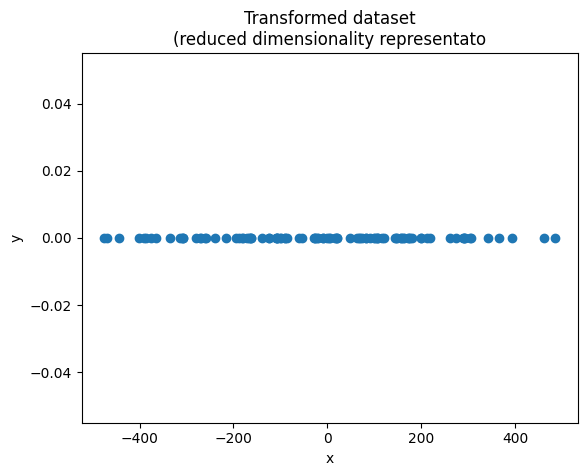

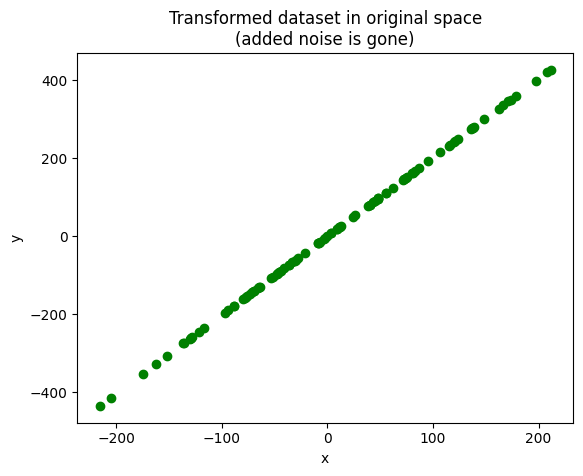

Loss in Information due to
dimensionality reduction: 5.570886135101318


In [4]:
# Dimensionality reduction using PCA
# With our previous example, we can clearly see that 
# one principal component accounts for majority of
# the variance.
# So we can convert this 2D dataset into 1D by
# projecting onto the first prinicipal component
first_princpal_vec = principal_components[:,
                                          major_index]
first_princpal_vec = first_princpal_vec.reshape((-1, 1))
print("First Principal Vector is:\n{}\n"
      "Note: It is a column vector, numpy represents\n"
      "it as a vector of vectors\n".
      format(first_princpal_vec))

# Project all the data vectors (row vectors of X)
#  onto the first principal vector.
# This means take dot product of each data vector
# with the first principal vector.
X_proj = torch.matmul(X, first_princpal_vec)
print("New data set shape: {} ".\
      format(X_proj.shape))

# Let us plot the projected data
plt.figure(1)
plt.title('Transformed dataset\n'
          '(reduced dimensionality representato')
plt.scatter(X_proj[:, 0],
            np.zeros_like(X_proj[:, 0]))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Note that this data is in terms of the new axes. 
# To view this in the original space, we'll need to project  
# it back into our original space.
# The back projection entails  some loss of information.
# But in this case, what we lose is noise. The back projected
# data is in fact the true underlying data sans noise.

#We use np.linalg.pinv to compute pseudo inverse
X_back_proj = torch.matmul(X_proj,
                torch.linalg.pinv(first_princpal_vec))

plt.figure(2)
plt.title('Transformed dataset in original space\n'
          '(added noise is gone)')
plt.scatter(X_back_proj[:, 0], X_back_proj[:, 1],
            color="green")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Information lost due to dimensionality reduction.
# (here we've lost only noise)
info_loss = torch.sqrt(torch.mean((X_back_proj - X)**2))
print("Loss in Information due to\ndimensionality"
      " reduction: {}".format(info_loss))